In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/fer2013
/kaggle/input/fer2013/test
/kaggle/input/fer2013/test/surprise
/kaggle/input/fer2013/test/fear
/kaggle/input/fer2013/test/angry
/kaggle/input/fer2013/test/neutral
/kaggle/input/fer2013/test/sad
/kaggle/input/fer2013/test/disgust
/kaggle/input/fer2013/test/happy
/kaggle/input/fer2013/train
/kaggle/input/fer2013/train/surprise
/kaggle/input/fer2013/train/fear
/kaggle/input/fer2013/train/angry
/kaggle/input/fer2013/train/neutral
/kaggle/input/fer2013/train/sad
/kaggle/input/fer2013/train/disgust
/kaggle/input/fer2013/train/happy


In [19]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## preprocessing the training dataset

In [20]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,   ## rescale or normalize the images pixels, by dividing them 255
    shear_range = 0.2,  ## angle for slant of image in degrees
    zoom_range = 0.2,   ## for zoom in or out
    horizontal_flip = True 
)
training_set = train_datagen.flow_from_directory(
    '/kaggle/input/fer2013/train',   ## give path of training set
    target_size=(48,48),      ## target_size of image in which you want
    batch_size=32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 28709 images belonging to 7 classes.


## preprocssing the testing dataset

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    '/kaggle/input/fer2013/test',
    target_size = (48,48),
    batch_size = 32,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

Found 7178 images belonging to 7 classes.


## Building the CNN Model

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [23]:
model = Sequential()

In [24]:
## Add 1st convolved layer
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(filters = 256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [25]:
## Add 2nd convolved layer
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [26]:
## Add 3rd convolved layer
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [27]:
## Add 4th convolved layer
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [28]:
## add flatten layer
model.add(Flatten())

In [29]:
## Full connection layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

In [30]:
## add output layer
model.add(Dense(7, activation='softmax'))

## Compiling the CNN model

In [31]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 256)       73984     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 256)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 22, 22, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [33]:
## Training the model
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
history = model.fit(training_set, 
                    epochs=50,
                    batch_size=32,
                    validation_data = test_set,
                    shuffle=True,
                    callbacks = [early_stop]
                   )

Epoch 1/50


2023-05-21 07:24:08.835370: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


898/898 [==============================] - 50s 53ms/step - loss: 1.8278 - accuracy: 0.2447 - val_loss: 1.8122 - val_accuracy: 0.2471
Epoch 2/50
898/898 [==============================] - 47s 53ms/step - loss: 1.7857 - accuracy: 0.2605 - val_loss: 1.6996 - val_accuracy: 0.3002
Epoch 3/50
898/898 [==============================] - 52s 58ms/step - loss: 1.6972 - accuracy: 0.3131 - val_loss: 1.5770 - val_accuracy: 0.3775
Epoch 4/50
898/898 [==============================] - 48s 53ms/step - loss: 1.6159 - accuracy: 0.3615 - val_loss: 1.4944 - val_accuracy: 0.4223
Epoch 5/50
898/898 [==============================] - 48s 53ms/step - loss: 1.5581 - accuracy: 0.3928 - val_loss: 1.4292 - val_accuracy: 0.4468
Epoch 6/50
898/898 [==============================] - 48s 53ms/step - loss: 1.5110 - accuracy: 0.4116 - val_loss: 1.3766 - val_accuracy: 0.4726
Epoch 7/50
898/898 [==============================] - 48s 53ms/step - loss: 1.4761 - accuracy: 0.4310 - val_loss: 1.3322 - val_accuracy: 0.4753
Epo

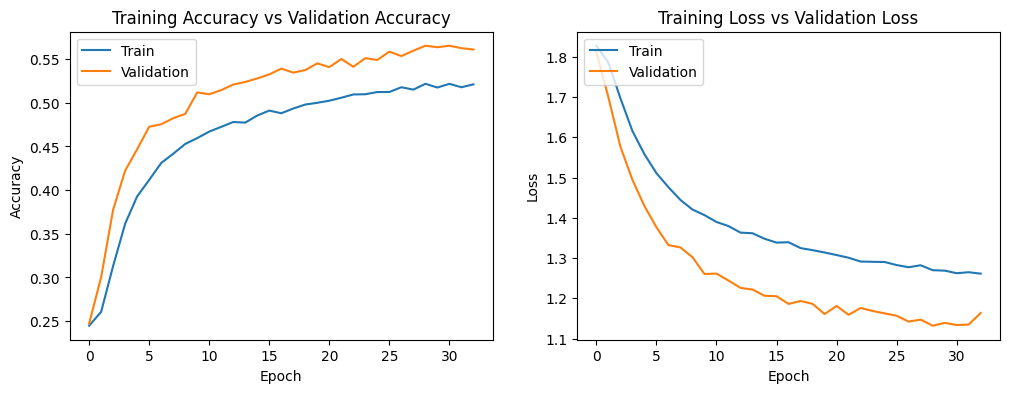

In [34]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [35]:
model.save('CNN_model.h5')

## Testing with testset images

(48, 48)


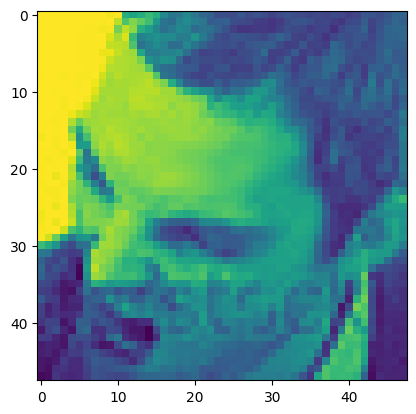

In [55]:
from keras.utils import load_img
img = load_img("/kaggle/input/fer2013/test/angry/PrivateTest_10590091.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [56]:
training_set.class_indices
label_dict = ['angry', 'disgust', 'fear','happy', 'neutral', 'sad', 'surprise']

In [57]:
from keras.utils import img_to_array
test_image = img_to_array(img)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result[0]

1/1 [==============================] - 0s 23ms/step


array([9.9999607e-01, 2.2045537e-19, 3.9425840e-06, 2.5079815e-17,
       5.6378388e-13, 4.5882883e-13, 1.3841064e-10], dtype=float32)

In [58]:
res = np.argmax(result[0])

In [59]:
print('predicted Label for that image is: {}'.format(label_dict[res]))

predicted Label for that image is: angry


In [60]:
train_loss, train_acc = model.evaluate(training_set)
test_loss, test_acc   = model.evaluate(test_set)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 14s 64ms/step - loss: 1.1633 - accuracy: 0.5610
final train accuracy = 56.34 , validation accuracy = 56.10


## if you like the notebook, please upvote the notebook